### T-test 실습

In [1]:
import pandas as pd
import sys

# cats데이터에서 고양이들의 평균 몸무게가 2.6 kg 인지 아닌지 통계적 검정을 수행하고 결과해석하기

In [2]:
cats = pd.read_csv("cats.csv")

cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [3]:
import scipy.stats as stats
mu = 2.6

stats.shapiro(cats["Bwt"]) # 유의수준 0.05에서 p_value값이 더 작으므로 정규성을 따르지 않음

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [4]:
# Wilcox test 검정

#p_value 가 0.025 로 귀무가설 기각
stats.wilcoxon(cats.Bwt - mu, alternative = "two-sided")

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [5]:
import matplotlib.pyplot as plt

[Text(0, 0.5, 'count')]

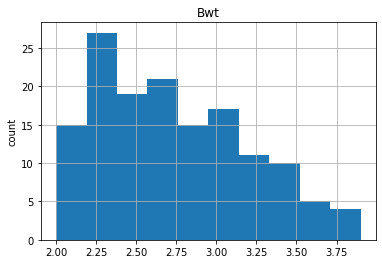

In [6]:
cats_Bwt_cnt = cats["Bwt"].sort_values(ascending = False).hist()

cats_Bwt_cnt.set(title = "Bwt")
cats_Bwt_cnt.set(ylabel = "count")

#확인해보면 고양이들의 평균 몸무게는 2.6kg가 아님

### 대응표본 t검정

In [7]:
# 10명의 환자 대상 수면영양제 복용전과 복용후의 수면시간 측정
# 영양제가 효과가 있는지를 판단하고자함
# 표본이 정규성을 만족한다는 가정하에 단측검정을 수행(유의수준 = 0.05)

In [8]:
import pandas as pd

data = {"before":[7,3,4,5,2,1,6,6,5,4], "after":[8,4,5,6,2,3,6,8,6,5]}

df = pd.DataFrame(data)

In [9]:
# df.mean()
df.describe()

,before,after
count,10.000000,10.000000
mean,4.300000,5.300000
std,1.888562,1.946507
min,1.000000,2.000000
25%,3.250000,4.250000
50%,4.500000,5.500000
75%,5.750000,6.000000
max,7.000000,8.000000


In [10]:
import scipy.stats
from scipy.stats import shapiro

shapiro(df["before"])
shapiro(df["after"])

#정규성을 만족

ShapiroResult(statistic=0.9456837177276611, pvalue=0.6177994012832642)

In [11]:
stats.ttest_rel(data["after"], data["before"], alternative = "greater")

#앞의 값이 더큰값이 들어와야함

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082765)

### 독립표본 T-검정

In [13]:
import scipy.stats 
from scipy.stats import shapiro

stats.shapiro(cats["Bwt"]) #표본분포가 정규성을 따르지 않음

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [14]:
#정규성을 따르지않아 윌콕슨 검정으로 바로 넘어가도 되나 실습용도 이므로 등분산 검정을 시행함
feamale = cats.loc[cats["Sex"] == "F","Bwt"]
male = cats.loc[cats["Sex"] == "M", "Bwt"]

stats.levene(feamale, male) # 0.05 보다 작으므로 등분산성 기각

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [15]:
stats.ttest_ind(feamale, male, equal_var = False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [16]:
print(feamale.mean())
print(male.mean())

2.359574468085107
2.8999999999999995


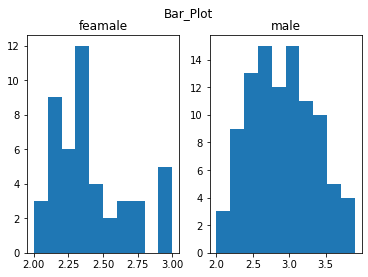

In [23]:
fig, axs = plt.subplots(1,2)

fig.suptitle("Bar_Plot")
axs[0].hist(feamale)
axs[0].set_title("feamale")
axs[1].hist(male)
axs[1].set_title("male")
plt.show()